In [1]:
import numpy as np
import imageio
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import img_to_array
from PIL import Image
import copy
from scipy.spatial import distance

In [2]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Images_Q3/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Images_Q3


#PART2

In [3]:
im_train = Image.open("train.jpg").convert('L')
im_test1 = Image.open("test1.png").convert('L')
im_test2 = Image.open("test2.png").convert('L')
im_test3 = Image.open("test3.png").convert('L')

In [4]:
#preprocessing
train = np.asarray(im_train.resize((64,64)),dtype=np.int32)
test1 = np.asarray(im_test1.resize((64,64)),dtype=np.int32)
test2 = np.asarray(im_test2.resize((64,64)),dtype=np.int32)
test3 = np.asarray(im_test3.resize((64,64)),dtype=np.int32)

In [5]:
#preprocessing
train[train<=125]=-1
train[train>125]=1

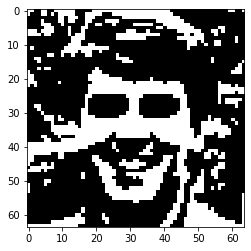

In [6]:
plt.imshow(train,cmap='gray')

#PART3

In [7]:
train=train.reshape(4096,1)

In [8]:
W=train@train.T-np.eye(4096)

In [9]:
print(W)

[[ 0.  1. -1. ...  1.  1.  1.]
 [ 1.  0. -1. ...  1.  1.  1.]
 [-1. -1.  0. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ...  0.  1.  1.]
 [ 1.  1. -1. ...  1.  0.  1.]
 [ 1.  1. -1. ...  1.  1.  0.]]


#PART4

In [10]:
#preprocessing
test1[test1<=125]=-1
test1[test1>125]=1
test2[test2<=125]=-1
test2[test2>125]=1
test3[test3<=125]=-1
test3[test3>125]=1

In [11]:
test1=test1.reshape(4096,1)
test2=test2.reshape(4096,1)
test3=test3.reshape(4096,1)

In [12]:
#reconstruct test1
def energy(state, W):
    return -0.5 * state.T @ W @ state
# save the evolution
ev = []
en = []
dist1=[]
vt = copy.deepcopy(test1)
energy_old = np.infty
energy_new = energy(vt, W)
steps = 200
epoch = 0
while (energy_old > energy_new) and epoch < steps: 
    iter=0
    epoch += 1
    energy_old = energy_new
    for ind in np.random.permutation(range(len(vt))):
        dist1.append(distance.hamming(vt, train))
        if dist1[-1] ==0:
          break
        ev.append(np.copy(vt))
        en.append(energy_old)
        iter+=1
        vt[ind] = np.sign(W[ind,:] @ vt) 
    energy_new = energy(vt, W)
    if dist1[-1] ==0:
      break
print('Stopped at epoch {}'.format(epoch))  
print('Stopped at iter {}'.format(iter))  

Stopped at epoch 1
Stopped at iter 4094


In [13]:
ev=np.squeeze(np.array(ev))

Text(0, 0.5, 'Hamming distance')

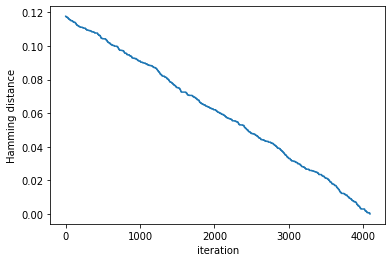

In [14]:
plt.plot(dist1)
plt.xlabel("iteration")
plt.ylabel("Hamming distance")

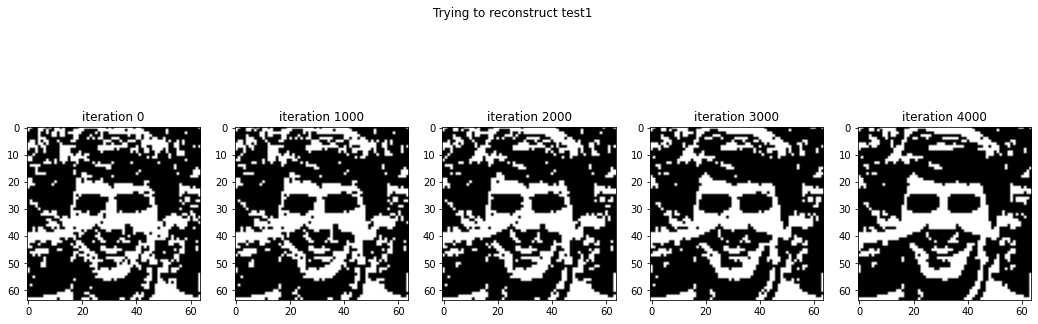

In [15]:
show_every = 1000
fig, ax = plt.subplots(1,int(len(ev)//show_every+1), figsize=(18,6))
axes = ax.ravel()
fig.suptitle('Trying to reconstruct test1')
plot_idx = 0
for idx in range(len(ev)//1000+1):
        axes[plot_idx].imshow(np.reshape(ev[idx*1000], (64,64)),cmap='gray')
        axes[plot_idx].set_title('iteration {}'.format(idx*1000))
        plot_idx += 1

In [16]:
#reconstruct test2
def energy(state, W):
    return -0.5 * state.T @ W @ state
# save the evolution
ev = []
en = []
dist2=[]
vt = copy.deepcopy(test2)
energy_old = np.infty
energy_new = energy(vt, W)
steps = 200
epoch = 0
while (energy_old > energy_new) and epoch < steps: 
    iter=0
    epoch += 1
    energy_old = energy_new
    for ind in np.random.permutation(range(len(vt))):
        dist2.append(distance.hamming(vt, train))
        if dist2[-1] ==0:
          break
        ev.append(np.copy(vt))
        en.append(energy_old)
        iter+=1
        vt[ind] = np.sign(W[ind,:] @ vt) 
    energy_new = energy(vt, W)
    if dist2[-1] ==0:
      break
print('Stopped at epoch {}'.format(epoch))  
print('Stopped at iter {}'.format(iter))  
ev=np.squeeze(np.array(ev))

Stopped at epoch 1
Stopped at iter 4081


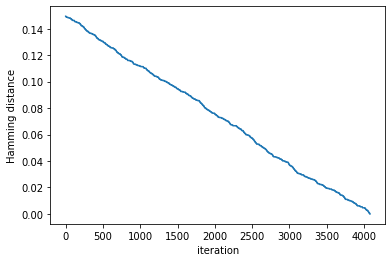

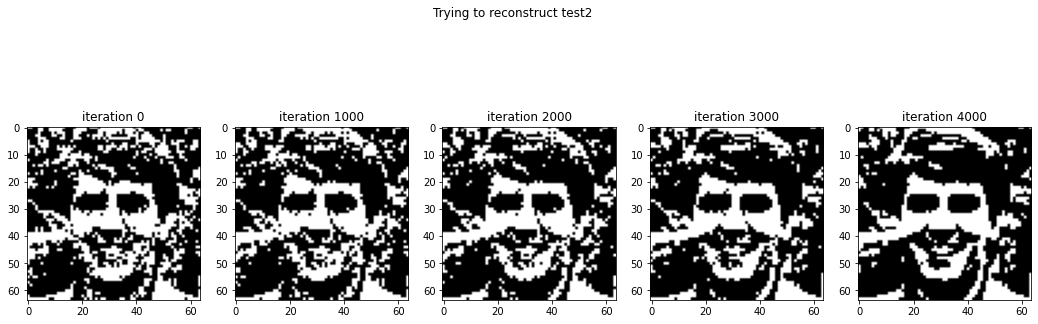

In [17]:
plt.plot(dist2)
plt.xlabel("iteration")
plt.ylabel("Hamming distance")
show_every = 1000
fig, ax = plt.subplots(1,int(len(ev)//show_every+1), figsize=(18,6))
axes = ax.ravel()
fig.suptitle('Trying to reconstruct test2')
plot_idx = 0
for idx in range(len(ev)//1000+1):
        axes[plot_idx].imshow(np.reshape(ev[idx*1000], (64,64)),cmap='gray')
        axes[plot_idx].set_title('iteration {}'.format(idx*1000))
        plot_idx += 1

In [18]:
#reconstruct test3
def energy(state, W):
    return -0.5 * state.T @ W @ state
# save the evolution
ev = []
en = []
dist3=[]
vt = copy.deepcopy(test3)
energy_old = np.infty
energy_new = energy(vt, W)
steps = 200
epoch = 0
while (energy_old > energy_new) and epoch < steps: 
    iter=0
    epoch += 1
    energy_old = energy_new
    for ind in np.random.permutation(range(len(vt))):
        dist3.append(distance.hamming(vt, train))
        if dist3[-1] ==0:
          break
        ev.append(np.copy(vt))
        en.append(energy_old)
        iter+=1
        vt[ind] = np.sign(W[ind,:] @ vt) 
    energy_new = energy(vt, W)
    if dist3[-1] ==0:
      break
print('Stopped at epoch {}'.format(epoch))  
print('Stopped at iter {}'.format(iter))  
ev=np.squeeze(np.array(ev))

Stopped at epoch 1
Stopped at iter 4071


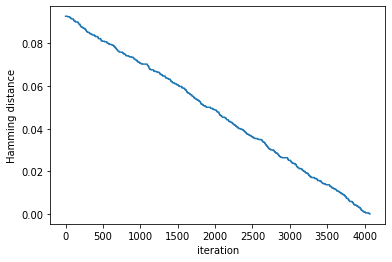

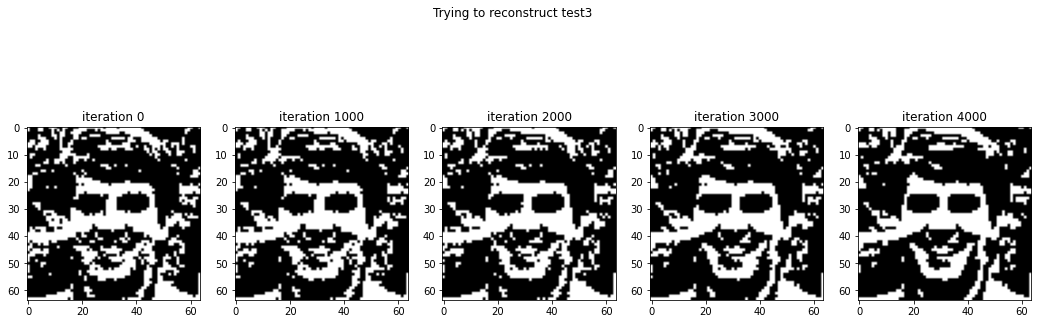

In [19]:
plt.plot(dist3)
plt.xlabel("iteration")
plt.ylabel("Hamming distance")
show_every = 1000
fig, ax = plt.subplots(1,int(len(ev)//show_every+1), figsize=(18,6))
axes = ax.ravel()
fig.suptitle('Trying to reconstruct test3')
plot_idx = 0
for idx in range(len(ev)//1000+1):
        axes[plot_idx].imshow(np.reshape(ev[idx*1000], (64,64)),cmap='gray')
        axes[plot_idx].set_title('iteration {}'.format(idx*1000))
        plot_idx += 1

#PART5

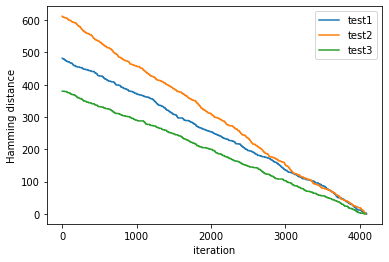

In [20]:
plt.plot(np.array(dist1)*4096)
plt.plot(np.array(dist2)*4096)
plt.plot(np.array(dist3)*4096)
plt.xlabel("iteration")
plt.ylabel("Hamming distance")
plt.legend(["test1","test2","test3"])
plt.show()